In [1]:
# Remove all existing versions completely
!pip uninstall -y numpy scipy scikit-learn tqdm
!pip cache purge


Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Successfully uninstalled numpy-1.21.6
Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3
Found existing installation: scikit-learn 1.1.3
Uninstalling scikit-learn-1.1.3:
  Successfully uninstalled scikit-learn-1.1.3
Found existing installation: tqdm 4.67.0
Uninstalling tqdm-4.67.0:
  Successfully uninstalled tqdm-4.67.0
Files removed: 11


In [2]:
!pip install numpy==1.26.4 scipy==1.14.0 scikit-learn==1.5.1 tqdm==4.67.0 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.


In [3]:
!pip install numpy --upgrade
!pip install scipy --upgrade



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 33.3 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 31.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into 

In [4]:
import sys, os
os.system("pip uninstall -y scikit-learn numpy scipy scikit-multilearn")
os.system("pip install --no-cache-dir numpy==1.21.6 scipy==1.7.3")
os.system("pip install --no-cache-dir scikit-learn==1.1.3 scikit-multilearn==0.2.0 tqdm")
print("Installed. NOW RESTART THE KERNEL / RUNTIME (Colab: Runtime -> Restart runtime, Jupyter: Kernel -> Restart).")


Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: scikit-multilearn 0.2.0
Uninstalling scikit-multilearn-0.2.0:
  Successfully uninstalled scikit-multilearn-0.2.0
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 66.2 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 2.2.3 requires numpy>=1.22.4; python_version < "3.11", but you have numpy 1.21.6 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 337.4 MB/s eta 0:00:00
Installed. NOW RESTART THE KERNEL / RUNTIME (Colab: Runtime -> Restart runtime, Jupyter: Kernel -> Restart).


In [1]:
import os
import bz2
import urllib.request
import numpy as np
import random
import time
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, hamming_loss
from scipy.sparse import vstack


In [2]:
# Download and read LexGLUE ECtHR (B) raw text dataset
base = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multilabel/"
files_b = {
    "train": "ecthr_b_lexglue_raw_texts_train.txt.bz2",
    "val":   "ecthr_b_lexglue_raw_texts_val.txt.bz2",
    "test":  "ecthr_b_lexglue_raw_texts_test.txt.bz2"
}

os.makedirs("data", exist_ok=True)

def download_if_missing(fname):
    dest = os.path.join("data", fname)
    if not os.path.exists(dest):
        url = base + fname
        print("Downloading:", url)
        urllib.request.urlretrieve(url, dest)
    return dest

def read_raw_txt_bz2(path):
    texts, labels = [], []
    with bz2.open(path, "rt", encoding="utf-8", errors="replace") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if "\t" in line:
                labstr, txt = line.split("\t", 1)
            else:
                parts = line.split(maxsplit=1)
                if len(parts) < 2:
                    continue
                labstr, txt = parts
            labs = [l.strip() for l in labstr.split(",") if l.strip() != ""]
            labels.append(labs)
            texts.append(txt.replace("\n", " "))
    return texts, labels

# Download all files for ECtHR (B)
paths_b = {k: download_if_missing(v) for k, v in files_b.items()}

# Read them
train_texts_b, train_labels_b = read_raw_txt_bz2(paths_b["train"])
val_texts_b, val_labels_b     = read_raw_txt_bz2(paths_b["val"])
test_texts_b, test_labels_b   = read_raw_txt_bz2(paths_b["test"])

train_texts_b = train_texts_b[:4000]
train_labels_b = train_labels_b[:4000]

val_texts_b = val_texts_b[:500]
val_labels_b = val_labels_b[:500]

test_texts_b = test_texts_b[:500]
test_labels_b = test_labels_b[:500]

print(f"Train: {len(train_texts_b)}, Val: {len(val_texts_b)}, Test: {len(test_texts_b)}")


Train: 4000, Val: 500, Test: 500


In [3]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import PCA
# 1. Load LEGAL-BERT
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 2. Setup batching
def get_cls_embeddings(texts, batch_size=16):
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(
            batch,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
            cls_embeddings = outputs.pooler_output.detach().cpu().numpy()
            all_embeddings.append(cls_embeddings)
    return np.vstack(all_embeddings)  # Shape: (num_samples, 768)

# 3. Encode multi-label targets
mlb = MultiLabelBinarizer()
mlb.fit(train_labels_b + val_labels_b + test_labels_b)  # Fit on all splits

# 4. Prepare each split (Example: Train set)
print("Processing train set...")
train_embeddings = get_cls_embeddings(train_texts_b, batch_size=16)
train_targets = mlb.transform(train_labels_b)  # Shape: (num_samples, num_classes)

print("Processing validation set...")
val_embeddings = get_cls_embeddings(val_texts_b, batch_size=16)
val_targets = mlb.transform(val_labels_b)

print("Processing test set...")
test_embeddings = get_cls_embeddings(test_texts_b, batch_size=16)
test_targets = mlb.transform(test_labels_b)

pca = PCA(n_components=200)
train_embeddings_pca = pca.fit_transform(train_embeddings)
val_embeddings_pca = pca.transform(val_embeddings)
test_embeddings_pca = pca.transform(test_embeddings)

print("Shapes:")
print("Train embeddings:", train_embeddings_pca.shape)
print("Train targets:", train_targets.shape)
print("Val embeddings:", val_embeddings_pca.shape)
print("Val targets:", val_targets.shape)
print("Test embeddings:", test_embeddings_pca.shape)
print("Test targets:", test_targets.shape)

# Now you have (embeddings, targets) pairs for ML modeling!
# Example for torch/keras: X = train_embeddings, y = train_targets

Processing train set...


100%|█████████████████████████████████████████████████████████████████████████████████| 250/250 [00:25<00:00,  9.99it/s]


Processing validation set...


100%|███████████████████████████████████████████████████████████████████████████████████| 32/32 [00:03<00:00,  9.72it/s]


Processing test set...


100%|███████████████████████████████████████████████████████████████████████████████████| 32/32 [00:03<00:00,  9.62it/s]


Shapes:
Train embeddings: (4000, 200)
Train targets: (4000, 167)
Val embeddings: (500, 200)
Val targets: (500, 167)
Test embeddings: (500, 200)
Test targets: (500, 167)


In [4]:
def ContinousCrossover(posA, posB, gamma=0.4):
    alpha = np.random.uniform(-gamma, 1 + gamma, size=posA.shape)
    child1 = alpha * posA + (1 - alpha) * posB
    child2 = alpha * posB + (1 - alpha) * posA
    return child1, child2

def ContinousMutation(position, problem, sigma=0.1):
    VarMin = problem['VarMin']
    VarMax = problem['VarMax']
    noise = np.random.normal(scale=sigma, size=position.shape)
    mutated = position + noise
    return np.clip(mutated, VarMin, VarMax)

def printingperiter(problem, it, gbest, namemethod, funcevals, curtrial, population=None):
    print(f"[{namemethod}] Iter {it} | Evals {funcevals} | Best cost {gbest['cost']:.5f}")


In [5]:
# === GLOBAL TRACKERS (Graph Ready) ===
history_log10C = []        # Track C parameter (log10 scale)
history_threshold = []     # Track threshold
history_class_weight = []  # Track class_weight parameter
history_f1micro = []       # Track F1-micro score
history_iter = []          # Track iteration number



In [6]:
def classifier_cost_function(particle, problem):
    pos = particle['position'].flatten()

    # Extract hyperparameters
    C = 10.0 ** float(pos[0])          # log10(C)
    threshold = float(pos[1])          # classification threshold
    class_w = float(pos[2])            # class weight multiplier

    # Create class weight dict for binary relevance per label
    # Each label has {0:1, 1:class_w}
    class_weight = {0: 1.0, 1: class_w}

    model = OneVsRestClassifier(
        LogisticRegression(
            C=C,
            solver='liblinear',
            max_iter=200,
            class_weight=class_weight
        )
    )

    try:
        model.fit(problem['X_train'], problem['Y_train'])
    except Exception:
        particle['cost'] = np.inf
        return particle

    # Prediction + thresholding
    prob = model.predict_proba(problem['X_val'])
    Y_pred = (prob >= threshold).astype(int)

    # Metric
    f1_micro = f1_score(
        problem['Y_val'], Y_pred,
        average='micro',
        zero_division=0
    )

    particle['cost'] = 1.0 - f1_micro

    # Store for final extraction
    particle['model'] = model
    particle['hyperparams'] = {
        'C': C,
        'threshold': threshold,
        'class_weight_1': class_w
    }

    return particle


In [7]:
import time
import numpy as np

# === GLOBAL TRACKERS (Graph Ready) ===
history_log10C = []        # Track C parameter (log10 scale)
history_threshold = []     # Track threshold
history_class_weight = []  # Track class_weight parameter (new)
history_f1micro = []       # Track F1-micro score
history_iter = []          # Track iteration number


def MA(problem, IterPrint, MaxIter, MaxFuncEvals, curtrial, initialpop,
       mPopSize, fPopSize, a1=1.0, a2=1.5, a3=1.5, beta=2, dance=5, fl=1,
       dance_damp=0.8, fl_damp=0.99, nc=10, gmax=0.8, gmin=0.8, gamma=0.4):
    """
    Modified MA (male-female) evolutionary optimizer with full tracking.

    Args:
        problem: dict with required keys:
            - 'VarMin', 'VarMax' (arrays or scalars)
            - 'nVar' (shape tuple for position, e.g. (1, 3) or (3,))
            - 'CostFunction' (callable: particle, problem -> particle with 'cost')
        IterPrint, MaxIter, MaxFuncEvals, curtrial: control variables
        initialpop: list of dicts with ['position'] for each initial particle
        mPopSize, fPopSize: sizes of male / female subpopulations
        other args: algorithm hyperparams (kept default values)

    Returns:
        namemethod (str), gbest_position, gbest_cost, elapsed_time
    """

    namemethod = 'MA'

    # Bounds and variable shapes
    VarMin = np.array(problem['VarMin'])
    VarMax = np.array(problem['VarMax'])
    nVar = problem['nVar']  # e.g. (1, 3) or (3,)
    # velocity limits (elementwise)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax

    # Algorithm state
    g = gmax
    funcevals = -1
    start_time = time.time()

    convergence_cost, convergence_f1 = [], []
    CostFunction = problem['CostFunction']
    gbest = {'position': None, 'cost': np.inf}

    # --- initialize populations ---
    pop, popf = [], []

    # Ensure initialpop has at least mPopSize + fPopSize entries
    assert len(initialpop) >= (mPopSize + fPopSize), "initialpop too small"

    # Male population
    for i in range(mPopSize):
        pos = np.array(initialpop[i]['position'])
        # velocity array must match pos shape; create same shape
        vel = np.zeros_like(pos, dtype=float)
        particle = {'position': pos, 'velocity': vel}
        particle = CostFunction(particle, problem)
        particle['best_position'] = pos.copy()
        particle['best_cost'] = particle['cost']
        if particle['cost'] < gbest['cost']:
            gbest = particle.copy()
        pop.append(particle)
        funcevals += 1

    # Female population
    for i in range(fPopSize):
        pos = np.array(initialpop[i + mPopSize]['position'])
        vel = np.zeros_like(pos, dtype=float)
        particle = {'position': pos, 'velocity': vel}
        particle = CostFunction(particle, problem)
        if particle['cost'] < gbest['cost']:
            gbest = particle.copy()
        popf.append(particle)
        funcevals += 1

    # --- main loop ---
    it = 0
    while funcevals < MaxFuncEvals - 1 and it < MaxIter:
        it += 1

        # --- update females ---
        for i in range(fPopSize):
            # safe elementwise operations; positions may be arrays
            if popf[i]['cost'] > pop[i]['cost']:
                rmf = np.abs(pop[i]['position'] - popf[i]['position'])
                # attraction term
                term = a3 * np.exp(-beta * (rmf ** 2)) * (pop[i]['position'] - popf[i]['position'])
                popf[i]['velocity'] = g * popf[i]['velocity'] + term
            else:
                popf[i]['velocity'] = g * popf[i]['velocity'] + fl * np.random.uniform(-1, 1, size=popf[i]['velocity'].shape)

            # clip and move
            popf[i]['velocity'] = np.clip(popf[i]['velocity'], VelMin, VelMax)
            popf[i]['position'] = np.clip(popf[i]['position'] + popf[i]['velocity'], VarMin, VarMax)

            # evaluate
            popf[i] = CostFunction(popf[i], problem)
            funcevals += 1

            if popf[i]['cost'] < gbest['cost']:
                gbest = popf[i].copy()

        # --- update males ---
        for i in range(mPopSize):
            if pop[i]['cost'] > gbest['cost']:
                rpbest = np.abs(pop[i]['best_position'] - pop[i]['position'])
                rgbest = np.abs(gbest['position'] - pop[i]['position'])
                term1 = a1 * np.exp(-beta * (rpbest ** 2)) * (pop[i]['best_position'] - pop[i]['position'])
                term2 = a2 * np.exp(-beta * (rgbest ** 2)) * (gbest['position'] - pop[i]['position'])
                pop[i]['velocity'] = g * pop[i]['velocity'] + term1 + term2
            else:
                pop[i]['velocity'] = g * pop[i]['velocity'] + dance * np.random.uniform(-1, 1, size=pop[i]['velocity'].shape)

            pop[i]['velocity'] = np.clip(pop[i]['velocity'], VelMin, VelMax)
            pop[i]['position'] = np.clip(pop[i]['position'] + pop[i]['velocity'], VarMin, VarMax)

            pop[i] = CostFunction(pop[i], problem)
            funcevals += 1

            # update personal best
            if pop[i]['cost'] < pop[i]['best_cost']:
                pop[i]['best_position'] = pop[i]['position'].copy()
                pop[i]['best_cost'] = pop[i]['cost']
                if pop[i]['best_cost'] < gbest['cost']:
                    gbest = pop[i].copy()

        # --- parameter update ---
        # linearly decrease g (or whatever schedule you want); ensure division by MaxFuncEvals not zero
        denom = MaxFuncEvals if MaxFuncEvals != 0 else 1
        g = gmax - ((gmax - gmin) / denom) * funcevals
        dance *= dance_damp
        fl *= fl_damp

        # --- Log per iteration ---
        # append iteration
        history_iter.append(it)

        # flatten to 1D so indexing is consistent (works for both 1D and 2D shapes)
        pos_flat = np.array(gbest['position']).flatten()

        # log10C: pos[0]
        if pos_flat.size >= 1:
            try:
                history_log10C.append(float(pos_flat[0]))
            except Exception:
                history_log10C.append(np.nan)
        else:
            history_log10C.append(np.nan)

        # threshold: pos[1]
        if pos_flat.size >= 2:
            try:
                history_threshold.append(float(pos_flat[1]))
            except Exception:
                history_threshold.append(np.nan)
        else:
            history_threshold.append(np.nan)

        # class weight: pos[2]
        if pos_flat.size >= 3:
            try:
                history_class_weight.append(float(pos_flat[2]))
            except Exception:
                history_class_weight.append(np.nan)
        else:
            history_class_weight.append(np.nan)

        # F1-micro (assuming cost = 1 - f1_micro)
        try:
            history_f1micro.append(1.0 - float(gbest['cost']))
        except Exception:
            history_f1micro.append(np.nan)

        # optional convergence logs
        convergence_cost.append(gbest['cost'])
        convergence_f1.append(1.0 - gbest['cost'] if np.isfinite(gbest['cost']) else np.nan)

        # print progress every IterPrint iterations
        if IterPrint is not None and IterPrint > 0 and (it % IterPrint == 0):
            # printingperiter is assumed to be defined elsewhere in your codebase
            try:
                printingperiter(problem, it, gbest, namemethod, funcevals, curtrial)
            except Exception:
                # fail-safe: don't break optimization if printing fails
                pass

    elapsed_time = time.time() - start_time

    return namemethod, gbest['position'], gbest['cost'], elapsed_time


In [8]:
import numpy as np

# === 3 parameters: log10(C), threshold, class_weight_multiplier ===
dim = 3
nVar = (1, dim)

# bounds for each parameter (elementwise)
# pos[0] = log10(C)  -> e.g. [-2, 3]  (C from 1e-2 to 1e3)
# pos[1] = threshold -> e.g. [0.05, 0.9]
# pos[2] = class weight multiplier -> e.g. [0.5, 10.0]
VarMin = np.array([-2.0, 0.05, 0.5])
VarMax = np.array([ 3.0, 0.9, 10.0])

ProblemStructure = {'position': None, 'cost': None}

problem = {
    'VarMin': VarMin,
    'VarMax': VarMax,
    'nVar': nVar,
    'ProblemStructure': ProblemStructure,
    'CostFunction': classifier_cost_function,  # expects pos[2] = class_weight
    'X_train': train_embeddings,
    'Y_train': train_targets,
    'X_val': val_embeddings,
    'Y_val': val_targets,
    'StopCriterion': 'Iterations'
}

# initial population (males + females)
mPopSize = 20
fPopSize = 20
initialpop = []
for _ in range(mPopSize + fPopSize):
    # draw in the shape (1, dim) to match your MA code expectations
    pos = VarMin + (VarMax - VarMin) * np.random.rand(nVar[0], nVar[1])
    initialpop.append({'position': pos})


In [9]:
import warnings
import numpy as np

# === suppress sklearn multiclass warnings during training ===
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.multiclass")

# Remove labels that are constant (all 0 or all 1) in the training set
label_sums = problem['Y_train'].sum(axis=0)
mask = (label_sums != 0) & (label_sums != problem['Y_train'].shape[0])

kept = int(mask.sum())
removed = int((~mask).sum())
print(f"Kept {kept} labels (removed {removed} constant ones).")

# Safety: ensure at least one label remains
if kept == 0:
    raise ValueError("All labels are constant in the training set after masking. "
                     "Cannot train a classifier. Check your data or label preprocessing.")

# Apply the mask to training and validation labels
problem['Y_train'] = problem['Y_train'][:, mask]
problem['Y_val'] = problem['Y_val'][:, mask]

# Ensure problem['nVar'] reflects the dimensionality of particle positions
# (MA & classifier_cost_function expect e.g. 3 params: log10(C), threshold, class_weight_multiplier)
expected_nvar_len = int(np.prod(problem.get('nVar', (1,)))) if 'nVar' in problem else None
# If not set or inconsistent, set to match VarMin/VarMax length
varmin_len = np.array(problem['VarMin']).flatten().size
varmax_len = np.array(problem['VarMax']).flatten().size
if expected_nvar_len is None or expected_nvar_len != varmin_len or varmin_len != varmax_len:
    problem['nVar'] = (varmin_len,)
    print(f"Setting problem['nVar'] = {problem['nVar']} to match VarMin/VarMax length ({varmin_len}).")

# Validate initial population
required_pop = mPopSize + fPopSize
if len(initialpop) < required_pop:
    raise ValueError(f"initialpop must contain at least {required_pop} particles "
                     f"(mPopSize + fPopSize). Currently: {len(initialpop)}")

expected_len = int(np.prod(problem['nVar']))
for idx in range(required_pop):
    pos_flat_len = np.array(initialpop[idx]['position']).flatten().size
    if pos_flat_len != expected_len:
        raise ValueError(f"initialpop[{idx}]['position'] must be length {expected_len} "
                         f"but has length {pos_flat_len}. Position: {initialpop[idx]['position']}")

# === Training / Optimization hyperparameters ===
IterPrint = 1
MaxIter = 10
MaxFuncEvals = 1500
curtrial = 1

# Run the MA training/optimization (this trains models internally via CostFunction)
res = MA(problem, IterPrint, MaxIter, MaxFuncEvals, curtrial, initialpop,
         mPopSize=mPopSize, fPopSize=fPopSize,
         a1=1.0, a2=1.5, a3=1.5, beta=2, dance=5, fl=1,
         dance_damp=0.8, fl_damp=0.99, nc=8, gmax=0.8, gmin=0.2, gamma=0.4)

namemethod, best_position, best_cost, elapsed_time = res

# Pretty-print results (safe flattening)
best_pos_flat = np.array(best_position).flatten()

print("\n✅ Training (optimization) complete")
print(f"Method: {namemethod}")
print("Best position (flattened):", best_pos_flat)
# Interpret components if present
if best_pos_flat.size >= 1:
    print(f" - best log10(C): {float(best_pos_flat[0]):.6g}")
if best_pos_flat.size >= 2:
    print(f" - best threshold: {float(best_pos_flat[1]):.6g}")
if best_pos_flat.size >= 3:
    print(f" - best class_weight multiplier: {float(best_pos_flat[2]):.6g}")

print("Best cost:", best_cost, "=> Best F1_micro:", 1.0 - float(best_cost))
print("Elapsed time (s):", elapsed_time)


Kept 155 labels (removed 12 constant ones).
[MA] Iter 1 | Evals 79 | Best cost 0.62078
[MA] Iter 2 | Evals 119 | Best cost 0.62078
[MA] Iter 3 | Evals 159 | Best cost 0.62078
[MA] Iter 4 | Evals 199 | Best cost 0.61644
[MA] Iter 5 | Evals 239 | Best cost 0.61644
[MA] Iter 6 | Evals 279 | Best cost 0.61644
[MA] Iter 7 | Evals 319 | Best cost 0.61580
[MA] Iter 8 | Evals 359 | Best cost 0.61435
[MA] Iter 9 | Evals 399 | Best cost 0.61397
[MA] Iter 10 | Evals 439 | Best cost 0.61384

✅ Training (optimization) complete
Method: MA
Best position (flattened): [-1.14282074  0.43882082  4.83394348]
 - best log10(C): -1.14282
 - best threshold: 0.438821
 - best class_weight multiplier: 4.83394
Best cost: 0.6138433515482695 => Best F1_micro: 0.3861566484517305
Elapsed time (s): 67843.28070187569


In [10]:
import numpy as np
from scipy.sparse import vstack as sp_vstack
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, hamming_loss
from scipy.special import expit  # sigmoid

# --- interpret best_position safely ---
best_pos_flat = np.array(best_position).flatten()
if best_pos_flat.size < 2:
    raise ValueError("best_position must contain at least log10(C) and threshold.")

best_log10C = float(best_pos_flat[0])
bestC = 10.0 ** best_log10C
best_threshold = float(best_pos_flat[1])

# class weight multiplier optional (default 1.0)
class_weight_multiplier = float(best_pos_flat[2]) if best_pos_flat.size >= 3 else 1.0

print(f"Retraining final model with C={bestC:.5g}, threshold={best_threshold:.3g}, "
      f"class_weight_multiplier={class_weight_multiplier:.3g}")

# --- Combine train + val robustly (sparse or dense) ---
try:
    # if train_embeddings are sparse matrices, use scipy.sparse.vstack
    X_trainval = sp_vstack([train_embeddings, val_embeddings])
except Exception:
    # fallback for dense numpy arrays
    X_trainval = np.vstack([np.asarray(train_embeddings), np.asarray(val_embeddings)])

Y_trainval = np.vstack([train_targets, val_targets])

# --- Build class_weight dict applied to each binary logistic inside OneVsRest ---
# For binary classifiers: {0:1.0, 1:class_weight_multiplier}
cw = {0: 1.0, 1: class_weight_multiplier}

final_estimator = LogisticRegression(C=bestC, solver='liblinear', max_iter=800, class_weight=cw)
final_model = OneVsRestClassifier(final_estimator)

# Fit (wrapped for safety)
try:
    final_model.fit(X_trainval, Y_trainval)
except Exception as e:
    # If fitting with explicit dict class_weight fails for any reason, try without it
    print("Warning: retraining with class_weight failed:", e)
    print("Retrying retrain without explicit class_weight...")
    final_estimator = LogisticRegression(C=bestC, solver='liblinear', max_iter=800)
    final_model = OneVsRestClassifier(final_estimator)
    final_model.fit(X_trainval, Y_trainval)

# --- Predict on test set, robust to predict_proba availability ---
def get_probabilities(model, X):
    # If model supports predict_proba, use it
    if hasattr(model, "predict_proba"):
        try:
            return model.predict_proba(X)
        except Exception:
            pass
    # Else try decision_function and map to [0,1] with sigmoid
    if hasattr(model, "decision_function"):
        try:
            df = model.decision_function(X)
            # decision_function may return shape (n_samples,) for single label or (n_samples, n_labels)
            return expit(df)
        except Exception:
            pass
    raise RuntimeError("Model doesn't support predict_proba or usable decision_function.")

prob_test = get_probabilities(final_model, test_embeddings)
Y_pred_test = (prob_test >= best_threshold).astype(int)

# --- Metrics ---
f1_macro_test = f1_score(test_targets, Y_pred_test, average='macro', zero_division=0)
f1_micro_test = f1_score(test_targets, Y_pred_test, average='micro', zero_division=0)
hamming = hamming_loss(test_targets, Y_pred_test)
# exact match ratio: proportion of samples where all labels exactly match
exact_match = np.mean(np.all(test_targets == Y_pred_test, axis=1))

print("\n📊 Test Metrics:")
print(f"F1 Macro: {f1_macro_test:.6f}")
print(f"F1 Micro: {f1_micro_test:.6f}")
print(f"Hamming Loss: {hamming:.6f}")
print(f"Exact Match Ratio: {exact_match:.6f}")


Retraining final model with C=0.071975, threshold=0.439, class_weight_multiplier=4.83

📊 Test Metrics:
F1 Macro: 0.032159
F1 Micro: 0.405310
Hamming Loss: 0.008048
Exact Match Ratio: 0.222000


In [11]:
# Convert all trackers to numpy arrays for safe slicing
import numpy as np

history_iter = np.array(history_iter)
history_log10C = np.array(history_log10C)
history_threshold = np.array(history_threshold)
history_f1micro = np.array(history_f1micro)

# history_class_weight may or may not exist depending on configuration
try:
    history_class_weight = np.array(history_class_weight)
except NameError:
    history_class_weight = None

# Determine minimum available length among trackers
if history_class_weight is not None:
    min_len = min(len(history_iter), len(history_log10C),
                  len(history_threshold), len(history_f1micro),
                  len(history_class_weight))
else:
    min_len = min(len(history_iter), len(history_log10C),
                  len(history_threshold), len(history_f1micro))

# Apply truncation to all trackers
history_iter = history_iter[:min_len]
history_log10C = history_log10C[:min_len]
history_threshold = history_threshold[:min_len]
history_f1micro = history_f1micro[:min_len]

if history_class_weight is not None:
    history_class_weight = history_class_weight[:min_len]


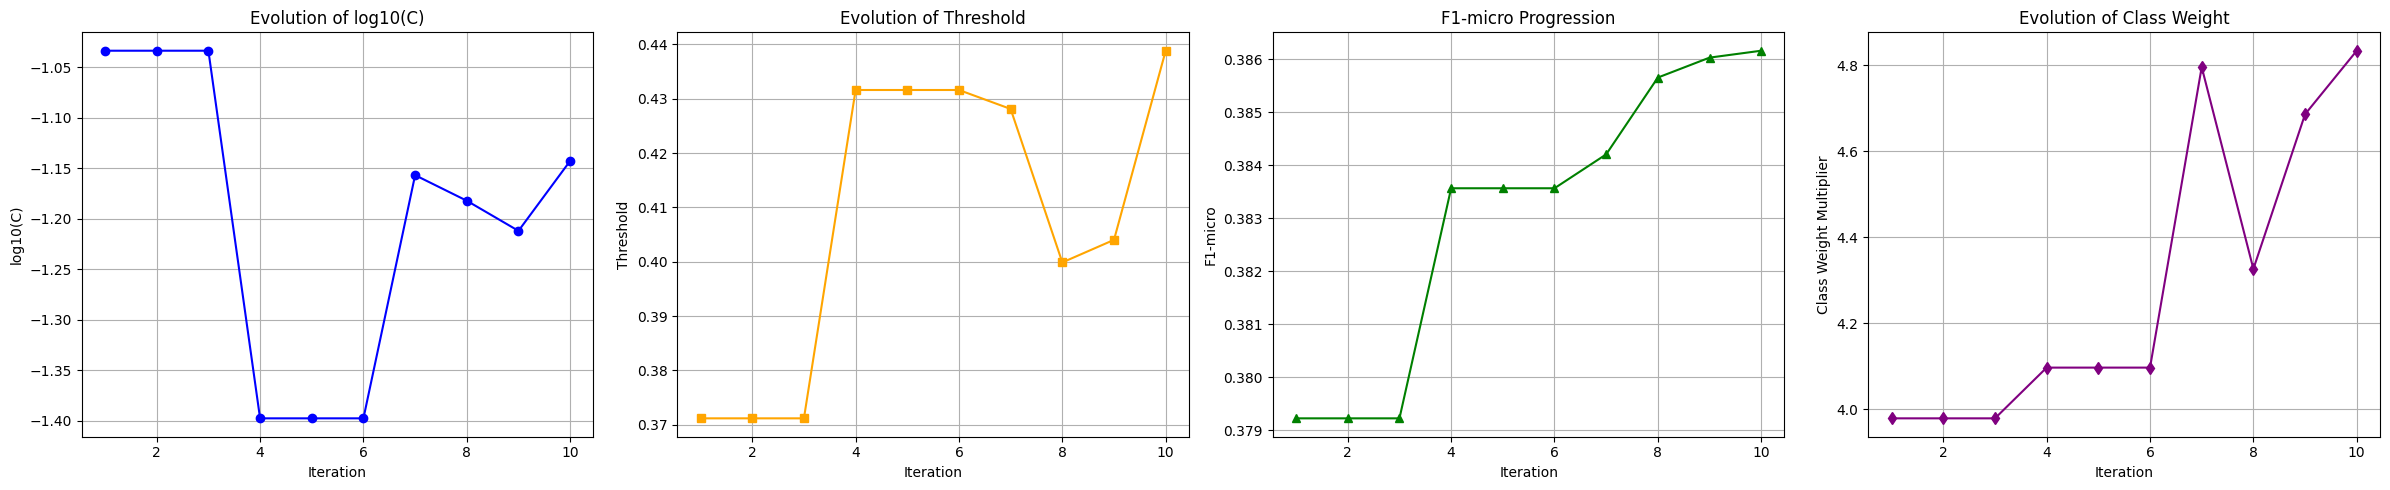

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays
history_iter = np.array(history_iter)
history_log10C = np.array(history_log10C)
history_threshold = np.array(history_threshold)
history_f1micro = np.array(history_f1micro)

# class weight may or may not exist in old runs
try:
    history_class_weight = np.array(history_class_weight)
    has_class_weight = True
except Exception:
    has_class_weight = False

# Create figure (4 panels if class_weight exists, otherwise 3)
num_plots = 4 if has_class_weight else 3
plt.figure(figsize=(6 * num_plots, 5))

# --- Plot 1: log10(C) ---
plt.subplot(1, num_plots, 1)
plt.plot(history_iter, history_log10C, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel("log10(C)")
plt.title("Evolution of log10(C)")
plt.grid(True)

# --- Plot 2: Threshold ---
plt.subplot(1, num_plots, 2)
plt.plot(history_iter, history_threshold, marker='s', linestyle='-', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Threshold")
plt.title("Evolution of Threshold")
plt.grid(True)

# --- Plot 3: F1-micro ---
plt.subplot(1, num_plots, 3)
plt.plot(history_iter, history_f1micro, marker='^', linestyle='-', color='green')
plt.xlabel("Iteration")
plt.ylabel("F1-micro")
plt.title("F1-micro Progression")
plt.grid(True)

# --- Plot 4 (Optional): Class Weight ---
if has_class_weight:
    plt.subplot(1, num_plots, 4)
    plt.plot(history_iter, history_class_weight, marker='d', linestyle='-', color='purple')
    plt.xlabel("Iteration")
    plt.ylabel("Class Weight Multiplier")
    plt.title("Evolution of Class Weight")
    plt.grid(True)

plt.tight_layout()
plt.show()
